## HyperParameters fine tuning 

### Random Forest Classifier 

In [17]:
#Libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

file  = r"https://raw.githubusercontent.com/alvarofavale/week7_ml/refs/heads/main/data/raw/train.csv"

df = pd.read_csv(file)

In [11]:
# "Cleaning"
X = df.drop(columns=['Credit_Score', 'ID', 'Customer_ID', 'Name', 'SSN', "Occupation", "Type_of_Loan"])
y = df['Credit_Score']

# https://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.LabelEncoder.html
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Encode categorical var 
X = pd.get_dummies(X)

# train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)


In [12]:
forest_class = RandomForestClassifier(n_estimators=100, max_depth=20)
forest_class.fit(X_train, y_train)

RandomForestClassifier(max_depth=20)

In [13]:
# Prediction
y_pred_test_rf = forest_class.predict(X_test)

print("random forest classifier")
print(f"MAE: {mean_absolute_error(y_test, y_pred_test_rf): .2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_test_rf): .2f}")
print(f"RMSE: {root_mean_squared_error(y_test, y_pred_test_rf): .2f}")
print(f"Accuracy score: {forest_class.score(X_test, y_test): .2f}")

random forest classifier
MAE:  0.29
MSE:  0.46
RMSE:  0.68
Accuracy score:  0.79


### Grid Search

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameter found :
{'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best accuracy score during cross-validation : 0.7920

Random Forest Classifier Optimized
Accuracy score: 0.80
MAE: 0.29
MSE: 0.45
RMSE: 0.67

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.78      0.75      5852
           1       0.80      0.79      0.79      9682
           2       0.83      0.80      0.82     17466

    accuracy                           0.80     33000
   macro avg       0.78      0.79      0.79     33000
weighted avg       0.80      0.80      0.80     33000



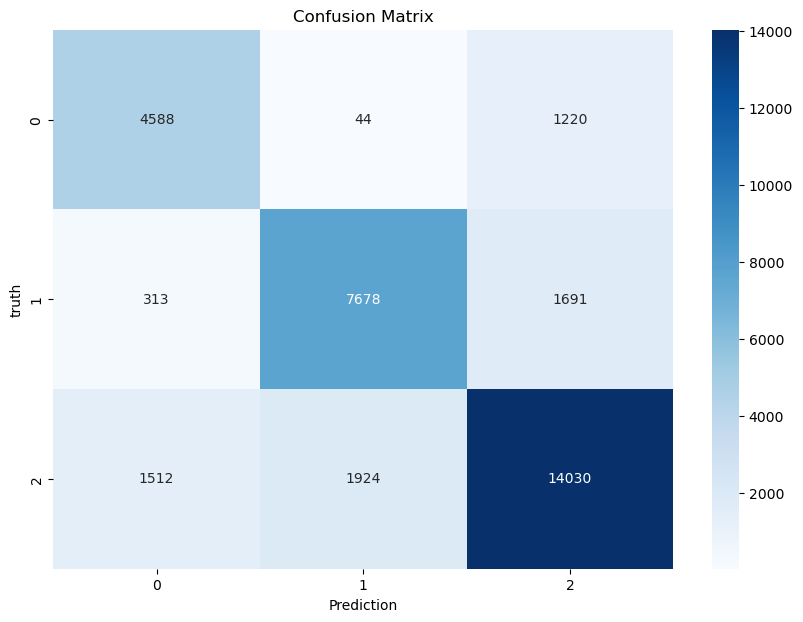

In [15]:
# Define Hyperparameter to test
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True]
}

rf = RandomForestClassifier(random_state=0)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,  
    n_jobs=-1,  
    verbose=2,  
    scoring='accuracy'  
)

grid_search.fit(X_train, y_train)


print("Best parameter found :")
print(grid_search.best_params_)

print(f"Best accuracy score during cross-validation : {grid_search.best_score_:.4f}")

best_rf = grid_search.best_estimator_
y_pred_test_rf = best_rf.predict(X_test)

print("\nRandom Forest Classifier Optimized")
print(f"Accuracy score: {best_rf.score(X_test, y_test):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_test_rf):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_test_rf):.2f}")
print(f"RMSE: {root_mean_squared_error(y_test, y_pred_test_rf):.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_test_rf))

plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, y_pred_test_rf), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prediction')
plt.ylabel('truth')
plt.title('Confusion Matrix')
plt.show()


### Random Search

Fitting 3 folds for each of 50 candidates, totalling 150 fits


c:\Users\aurel\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
42 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
27 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\aurel\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\aurel\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\aurel\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\aurel\anaconda3\Lib\site-packages

Best parameter found :
{'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 323}
Best accuracy score during cross-validation :  0.8083

Random Forest Classifier Optimisé
Accuracy score: 0.83
MAE: 0.24
MSE: 0.38
RMSE: 0.62

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.79      0.79      5852
           1       0.81      0.85      0.83      9682
           2       0.85      0.83      0.84     17466

    accuracy                           0.83     33000
   macro avg       0.82      0.82      0.82     33000
weighted avg       0.83      0.83      0.83     33000



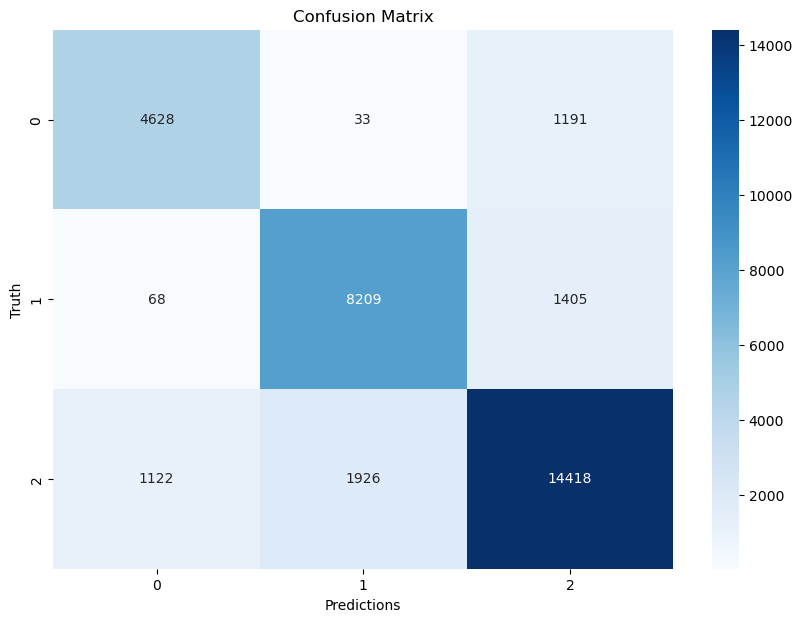

In [18]:
param_dist = {
    'n_estimators': randint(100, 500),          
    'max_depth': [10, 20, 30, None],             
    'min_samples_split': randint(2, 11),         
    'min_samples_leaf': randint(1, 5),           
    'bootstrap': [True, False],                  
    'criterion': ['gini', 'entropy'],            
    'max_features': ['auto', 'sqrt', 'log2', None]  }


rf = RandomForestClassifier(random_state=0)


random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,               
    cv=3,                    
    n_jobs=-1,               
    verbose=2,              
    scoring='accuracy',      
    random_state=0,
    return_train_score=True 
)


random_search.fit(X_train, y_train)


print("Best parameter found :")
print(random_search.best_params_)

print(f"Best accuracy score during cross-validation :  {random_search.best_score_:.4f}")

best_rf = random_search.best_estimator_
y_pred_test_rf = best_rf.predict(X_test)

print("\nRandom Forest Classifier Optimisé")
print(f"Accuracy score: {best_rf.score(X_test, y_test):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_test_rf):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_test_rf):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test_rf)):.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_test_rf))

plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, y_pred_test_rf), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predictions')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()